# Done by:

## Yuvaraj Tankala - AP19110010221

## Subrahmanyam Konakanchi - AP19110010192

In [38]:
import pandas as pd

import matplotlib.pyplot as plt 

import numpy as np

from sklearn.neighbors import KNeighborsClassifier 

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn import metrics

from scipy import stats


In [4]:

df=pd.read_csv("gre.csv")


df1=pd.read_csv("gre.csv")

df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df=df.drop(["Chance of Admit "],axis=1)


df=df.drop(["Serial No."],axis=1)

df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [6]:
df1["Chance of Admit "] = df1["Chance of Admit "].apply(lambda x : 1 if x > 0.7 else 0) 

df1.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,1
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X=np.array(df).reshape(-1,7) 

Y=np.array(df1["Chance of Admit "]) 

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2) 

x_train = sc.fit_transform(x_train)

x_test = sc.fit_transform(x_test)


clf = KNeighborsClassifier(n_neighbors = 8) 

clf.fit(x_train, y_train) 


KNeighborsClassifier(n_neighbors=8)

In [18]:
from sklearn import metrics


out=clf.predict(x_test)


accuracy = metrics.accuracy_score(y_test, out)
accuracy_percentage = 100 * accuracy


print(accuracy_percentage)



86.25


In [19]:

cm = metrics.confusion_matrix(y_test,out)

cm

array([[29,  6],
       [ 5, 40]], dtype=int64)

In [20]:
op = metrics.f1_score(y_test,out)
op

0.8791208791208792

<AxesSubplot:>

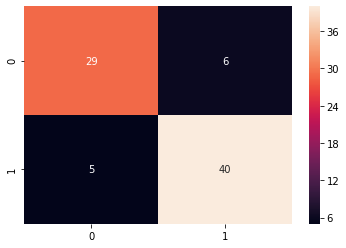

In [21]:
import seaborn as sns

sns.heatmap(cm, annot=True)

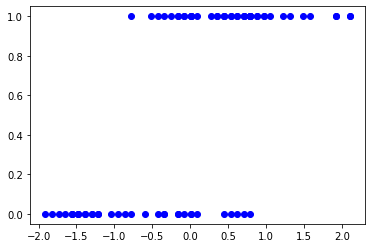

In [22]:
plt.scatter(x_test[:,0], y_test, color ='b') 

In [23]:
from sklearn.linear_model import LogisticRegression

from sklearn import metrics 

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)


x_train = sc.fit_transform(x_train)

x_test = sc.fit_transform(x_test)



logistic_regression = LogisticRegression().fit(x_train,y_train)

y_pred = logistic_regression.predict(x_test)

accuracy = metrics.accuracy_score(y_test, y_pred)

accuracy_percentage = 100 * accuracy

print(accuracy_percentage)

81.25


<AxesSubplot:>

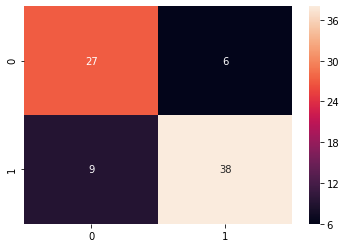

In [24]:
cm = metrics.confusion_matrix(y_test,y_pred)

cm

import seaborn as sns

sns.heatmap(cm, annot=True)

In [25]:
from sklearn.ensemble import RandomForestClassifier

RFC=RandomForestClassifier()

# Training Model
RFC.fit(x_train, y_train)

# Predicting the x_test with RFC
RFC_pred=RFC.predict(x_test)


RFC_pred_testdata = RFC.predict(df)
RFC_pred_testdata


RFC_pred=RFC.predict(x_test)

# Accuracy for RFC

print('Random Forest Classifier accuracy = ', metrics.accuracy_score(RFC_pred,y_test))




RFC_accuracy = metrics.accuracy_score(y_test, RFC_pred)

accuracy_percentage = 100 * RFC_accuracy


Random Forest Classifier accuracy =  0.8125


C:\Users\Subbu\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


<AxesSubplot:>

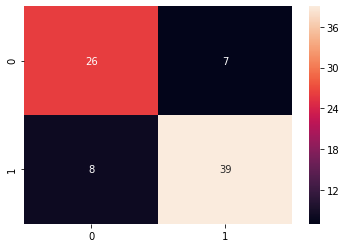

In [26]:
cm = metrics.confusion_matrix(y_test,RFC_pred)

cm

import seaborn as sns

sns.heatmap(cm, annot=True)

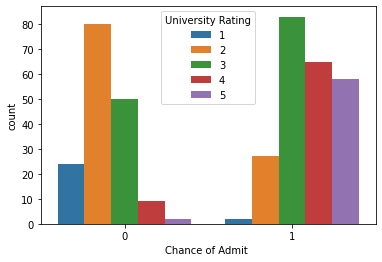

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(hue ='University Rating',  x= "Chance of Admit ", data = df1)
#plt.scatter(df["GRE Score"],df["admit"])
plt.show()


In [32]:
df=pd.DataFrame()
Model=['KNN','Random Forest','Logistic Regression']

accuracy_score = [86.5,81.2,82.0]

df['Model']=Model
df['Accuracy']=accuracy_score

color=sns.light_palette("green",as_cmap=True)
visual=df.style.background_gradient(cmap=color)
visual

,Model,Accuracy
0,KNN,86.5
1,Random Forest,81.2
2,Logistic Regression,82


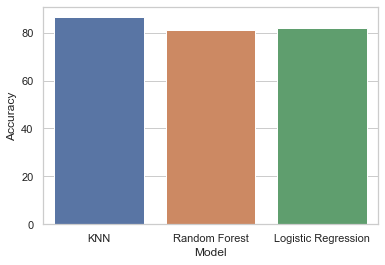

In [33]:
sns.set(style="whitegrid")
ax=sns.barplot(y='Accuracy',x='Model',data=df)

In [ ]:
# Ensemble learning (Max voting method)

final_pred = np.array([])
for i in range(0,len(x_test)):
    final_pred = np.append(final_pred, stats.mode([out[i], y_pred[i], RFC_pred[i]]))

In [40]:
final_pred

array([1., 2., 0., 2., 1., 3., 0., 2., 0., 3., 1., 3., 1., 2., 1., 2., 1.,
       3., 1., 3., 1., 3., 1., 2., 0., 3., 0., 2., 1., 2., 0., 3., 1., 3.,
       1., 2., 0., 3., 0., 2., 1., 2., 0., 2., 1., 3., 0., 2., 1., 2., 1.,
       3., 1., 2., 1., 2., 1., 3., 0., 2., 0., 2., 1., 3., 1., 3., 1., 2.,
       0., 2., 1., 3., 1., 3., 1., 3., 1., 2., 0., 3., 0., 3., 0., 2., 0.,
       2., 0., 2., 1., 3., 0., 2., 0., 3., 0., 3., 1., 3., 1., 2., 1., 3.,
       1., 3., 0., 2., 1., 2., 0., 2., 1., 2., 0., 3., 1., 3., 1., 2., 1.,
       2., 0., 2., 1., 3., 1., 2., 1., 2., 0., 2., 0., 2., 0., 2., 0., 2.,
       1., 2., 1., 2., 1., 2., 0., 3., 1., 2., 1., 2., 1., 3., 0., 2., 0.,
       3., 0., 3., 1., 3., 0., 2.])

In [22]:
import joblib
joblib.dump(clf,'gre.pkl')

model1=joblib.load('gre.pkl')

model1.predict(x_train)

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,